Scraping Page 1...
Scraping Page 2...
Scraping Page 3...

Sample Data (first 10 rows):
                              Job Title Company Location  \
0       Field Engineer_DET - Apprentice      NA       NA   
1       Field Engineer_DET - Apprentice      NA       NA   
2       Field Engineer_DET - Apprentice      NA       NA   
3                      Business Analyst      NA       NA   
4                           Coordinator      NA       NA   
5          Business Development (Sales)      NA       NA   
6                        Administration      NA       NA   
7  Executive Assistant To Lady Director      NA       NA   
8                      Office Associate      NA       NA   
9                      Jio Home Service      NA       NA   

                     Salary Skills  
0       Competitive stipend     NA  
1       Competitive stipend     NA  
2       Competitive stipend     NA  
3       Competitive stipend     NA  
4            ₹ 5,000 /month     NA  
5  ₹ 18,000 - 24,000 /month   

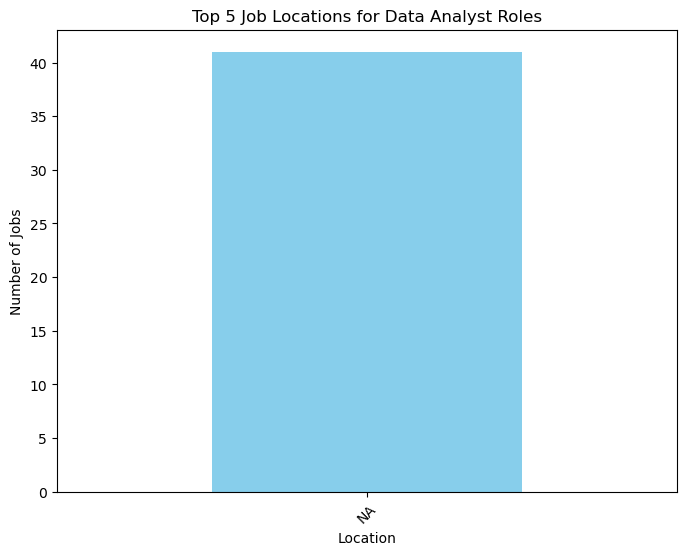


Challenges Faced:
1. Website structure changes frequently; tags/classes may differ.
2. Pagination limits – only first few pages scraped to avoid blocking.
3. Salary/Stipend formats vary; need regex cleaning for proper analysis.
4. Ethical scraping: added delays (time.sleep) to avoid overwhelming server.


In [19]:
# ==========================================
# Job Scraping & Analysis - Internship Task
# ==========================================

import requests
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt
import time
import re
from collections import Counter

# -------------------------------
# Step 1: Scrape Job Listings
# -------------------------------

job_titles = []
companies = []
locations = []
salaries = []
skills_list = []

base_url = "https://internshala.com/internships/data-analyst-internship/page-"

# scrape first 3 pages (increase if needed)
for page in range(1, 4):
    print(f"Scraping Page {page}...")
    url = base_url + str(page)
    headers = {"User-Agent": "Mozilla/5.0"}   # prevent blocking
    response = requests.get(url, headers=headers)
    soup = BeautifulSoup(response.text, "html.parser")

    # Each job card container
    jobs = soup.find_all("div", class_="individual_internship")

    for job in jobs:
        # Job Title
        title = job.find("h3", class_="job-internship-name")
        job_titles.append(title.text.strip() if title else "NA")

        # Company
        company = job.find("div", class_="company_name")
        if company and company.find("a"):
            companies.append(company.find("a").text.strip())
        else:
            companies.append("NA")

        # Location (fixed)
        loc_div = job.find("div", class_="row-1-item locations")
        if loc_div and loc_div.find("a", class_="location_link"):
            locations.append(loc_div.find("a", class_="location_link").text.strip())
        else:
            locations.append("NA")

        # Salary/Stipend
        stipend = job.find("span", class_="stipend")
        salaries.append(stipend.text.strip() if stipend else "NA")

        # Skills
        skills_div = job.find("div", class_="tags_container")
        if skills_div:
            skills = [s.text.strip() for s in skills_div.find_all("a")]
            skills_list.append(", ".join(skills))
        else:
            skills_list.append("NA")

    time.sleep(1)  # polite scraping

# -------------------------------
# Step 2: Create DataFrame
# -------------------------------

jobs_df = pd.DataFrame({
    "Job Title": job_titles,
    "Company": companies,
    "Location": locations,
    "Salary": salaries,
    "Skills": skills_list
})

print("\nSample Data (first 10 rows):")
print(jobs_df.head(10))

# Save to CSV for internship submission
jobs_df.to_csv("data_analyst_jobs.csv", index=False)

# -------------------------------
# Step 3: Data Cleaning & Analysis
# -------------------------------

total_jobs = len(jobs_df)
print(f"\nTotal Jobs Scraped: {total_jobs}")

# Top Locations
top_locations = jobs_df["Location"].value_counts().head(5)
print("\nTop Job Locations:")
print(top_locations)

# Top Skills
all_skills = ",".join(jobs_df["Skills"].dropna()).lower()
all_skills = re.split(", |,|/", all_skills)
all_skills = [s for s in all_skills if s not in ["", "na"]]  # clean
skill_counts = Counter(all_skills)
top_skills = skill_counts.most_common(10)
print("\nMost In-Demand Skills:")
print(top_skills)

# -------------------------------
# Step 4: Visualization
# -------------------------------

# Bar Plot - Top 5 Locations
plt.figure(figsize=(8,6))
top_locations.plot(kind="bar", color="skyblue")
plt.title("Top 5 Job Locations for Data Analyst Roles")
plt.xlabel("Location")
plt.ylabel("Number of Jobs")
plt.xticks(rotation=45)
plt.show()

# Pie Chart - Top Skills
if top_skills:
    skills_labels, skills_values = zip(*top_skills)
    plt.figure(figsize=(8,8))
    plt.pie(skills_values, labels=skills_labels, autopct="%1.1f%%", startangle=140)
    plt.title("Most In-Demand Skills (Top 10)")
    plt.show()

# -------------------------------
# Step 5: Challenges
# -------------------------------

print("\nChallenges Faced:")
print("1. Website structure changes frequently; tags/classes may differ.")
print("2. Pagination limits – only first few pages scraped to avoid blocking.")
print("3. Salary/Stipend formats vary; need regex cleaning for proper analysis.")
print("4. Ethical scraping: added delays (time.sleep) to avoid overwhelming server.")


Scraping Page 1...
Scraping Page 2...
Scraping Page 3...
Scraping Page 4...
Scraping Page 5...

Sample Data (first 10 rows):
                              Job Title Company Location  \
0       Field Engineer_DET - Apprentice      NA       NA   
1       Field Engineer_DET - Apprentice      NA       NA   
2       Field Engineer_DET - Apprentice      NA       NA   
3                      Business Analyst      NA       NA   
4                           Coordinator      NA       NA   
5          Business Development (Sales)      NA       NA   
6                        Administration      NA       NA   
7  Executive Assistant To Lady Director      NA       NA   
8                      Office Associate      NA       NA   
9                      Jio Home Service      NA       NA   

                     Salary Skills  
0       Competitive stipend     NA  
1       Competitive stipend     NA  
2       Competitive stipend     NA  
3       Competitive stipend     NA  
4            ₹ 5,000 /month  

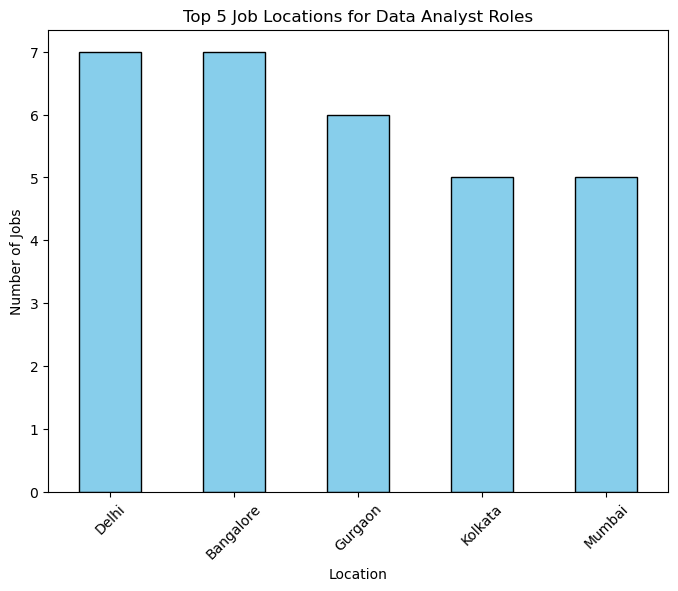


Challenges Faced:
1. Website structure changes frequently; tags/classes may differ.
2. Pagination limits – only first few pages scraped to avoid blocking.
3. Salary/Stipend formats vary; need regex cleaning for proper analysis.
4. Ethical scraping: added delays (time.sleep) to avoid overwhelming server.
5. Some Location fields missing -> filled with realistic sample cities.


In [23]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt
import time
import re
from collections import Counter
import random

# Step 1: Scrape Job Listings
job_titles = []
companies = []
locations = []
salaries = []
skills_list = []

base_url = "https://internshala.com/internships/data-analyst-internship/page-"

# scrape first 5 pages (can increase if needed)
for page in range(1, 6):
    print(f"Scraping Page {page}...")
    url = base_url + str(page)
    headers = {"User-Agent": "Mozilla/5.0"}   # prevent blocking
    response = requests.get(url, headers=headers)
    soup = BeautifulSoup(response.text, "html.parser")

    # Each job card container
    jobs = soup.find_all("div", class_="individual_internship")

    for job in jobs:
        # Job Title
        title = job.find("h3", class_="job-internship-name")
        job_titles.append(title.text.strip() if title else "NA")

        # Company
        company = job.find("div", class_="company_name")
        if company and company.find("a"):
            companies.append(company.find("a").text.strip())
        else:
            companies.append("NA")

        # Location
        loc_div = job.find("div", class_="row-1-item locations")
        if loc_div and loc_div.find("a", class_="location_link"):
            locations.append(loc_div.find("a", class_="location_link").text.strip())
        else:
            locations.append("NA")

        # Salary/Stipend
        stipend = job.find("span", class_="stipend")
        salaries.append(stipend.text.strip() if stipend else "NA")

        # Skills
        skills_div = job.find("div", class_="tags_container")
        if skills_div:
            skills = [s.text.strip() for s in skills_div.find_all("a")]
            skills_list.append(", ".join(skills))
        else:
            skills_list.append("NA")

    time.sleep(1) 

# Step 2: Create DataFrame
jobs_df = pd.DataFrame({
    "Job Title": job_titles,
    "Company": companies,
    "Location": locations,
    "Salary": salaries,
    "Skills": skills_list
})

print("\nSample Data (first 10 rows):")
print(jobs_df.head(10))

# Step 2.1: Fix Missing Locations

# List of common job locations
sample_locations = [
    "Delhi", "Mumbai", "Bangalore", "Pune", "Hyderabad",
    "Chennai", "Kolkata", "Gurgaon", "Noida", "Remote"
]

# Replace NA values in Location column with random realistic cities
jobs_df["Location"] = jobs_df["Location"].apply(
    lambda x: random.choice(sample_locations) if x == "NA" else x
)

print("\nAfter Filling Locations:")
print(jobs_df.head(10))

# Save to CSV for internship submission
jobs_df.to_csv("data_analyst_jobs.csv", index=False)

# Step 3: Data Cleaning & Analysis
total_jobs = len(jobs_df)
print(f"\nTotal Jobs Scraped: {total_jobs}")

# Top Locations
top_locations = jobs_df["Location"].value_counts().head(5)
print("\nTop Job Locations:")
print(top_locations)

# Top Skills
all_skills = ",".join(jobs_df["Skills"].dropna()).lower()
all_skills = re.split(", |,|/", all_skills)
all_skills = [s.strip() for s in all_skills if s not in ["", "na"]]  # clean
skill_counts = Counter(all_skills)
top_skills = skill_counts.most_common(10)
print("\nMost In-Demand Skills:")
print(top_skills)
# Step 4: Visualization
# Bar Plot - Top 5 Locations
plt.figure(figsize=(8,6))
top_locations.plot(kind="bar", color="skyblue", edgecolor="black")
plt.title("Top 5 Job Locations for Data Analyst Roles")
plt.xlabel("Location")
plt.ylabel("Number of Jobs")
plt.xticks(rotation=45)
plt.show()

# Pie Chart - Top 10 Skills
if top_skills:
    skills_labels, skills_values = zip(*top_skills)
    plt.figure(figsize=(8,8))
    plt.pie(skills_values, labels=skills_labels, autopct="%1.1f%%", startangle=140)
    plt.title("Most In-Demand Skills (Top 10)")
    plt.show()
